# Tarea - Caminata aleatoria

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

W_i es la posición en el paso (o iteración) i    
W_i-1 es la posición en el paso anterior   
X_i toma valores aleatorios de 1 o -1 con la misma probabilidad   
\delta t es el tamaño del intervalo de tiempo   

\delta t es el intervalo de tiempo por "paso". Entonces 
$$ número de pasos  = (tiempo tot) / (\delta t )$$ 
$$ n = (10)/(0.001)$$
n = 10,000 pasos 

W_0 = 0 (el origen) para cada coordenada (x, y y z) 

In [16]:
#Para cada paso i hay que generar un valor Xi aleatoriamente como 1 o -1 con la misma probabilidad 
#Calculo la nueva posición con la fórmula 
#Guardo las posiciones en listas para las 3 variables 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import random 

n = 10000
delta_t = 0.001 

#arreglos numpy de ceros de tamaño n que iré sustituyendo con los valores de las posiciones 
x = np.zeros(n) 
y = np.zeros(n)
z = np.zeros(n)
opciones = [1, -1] 

  
for i in range(0, n):
    X_ix = np.random.choice(opciones) #escoge 1 o -1 con la misma probabilidad 
    X_iy = np.random.choice(opciones)
    X_iz = np.random.choice(opciones)
    suma_x = X_ix * np.sqrt(delta_t) #la sección de la derecha de la suma en la fórmula 
    suma_y = X_iy * np.sqrt(delta_t)
    suma_z = X_iz * np.sqrt(delta_t)
    x[i] = x[i-1] + suma_x
    y[i] = y[i-1] + suma_y
    z[i] = z[i-1] + suma_z

#Con eso ya tengo mis arreglos con las posiciones en cada paso
#Si quisiera saber la posición final en la que quedó la partícula en el "medio fluido" después de 10s sólo necesito saber la posición final de cada uno de mis arreglos
#Es decir x[9,999] OJOOO no es posición 10,000 pq aunque sean 10,000 componentes, los índices empiezan en 0 


    
x[9999], y[9999], z[9999]
#Es normal que sean valores pequeños pq la particula se mueve una distancia de 0.001 en cada eje con cada paso 

(-0.6324555320336757, -0.9486832980505133, 0.7589466384404107)

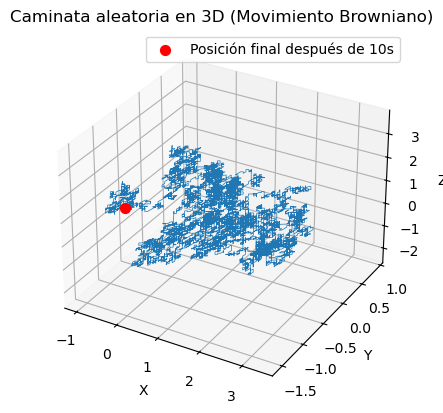

In [79]:
#Para el gráfico 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)  # lw: grosor de la línea


ax.set_title('Caminata aleatoria en 3D (Movimiento Browniano)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(x[-1], y[-1], z[-1], color='red', s=50, label='Posición final después de 10s')

ax.legend()
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

Jugador comienza con 20 pesos   
En cada volado (iteración):   
* apuesta la mitad de su capital si su capital es igual o mayor a 6 pesos  
* 2 pesos si su capital es menor a 6 pesos  
En cada volado el jugador tiene 50% de prob de ganar o perder  
Si gana su capital aumenta por el monto apostado  
Si pierde, su capital disminuye por el mismo monto  
V_i es el resultado del volado; +1 si gana o -1 si pierde  
A_i es lo que apuesta   

In [90]:
#Primero hago el código para una partida individual 

import numpy as np
import matplotlib.pyplot as plt

# Función para simular una partida hasta que el capital llegue a cero
def juego(capital_inicial=20): #defino el argumento como fijo, porque siempre será el mismo valor no importa cuántas veces se llame a la función (a menos que lo especifique de otra forma)
    capital = capital_inicial #capital es el dinero que irá cambiando hasta llegar a 0 
    historial = [capital]  #creo una lista que contendrá el comportamiento del dinero hasta el final. 
    #En lugar de hacer una lista vacía pongo de una vez el capital inicial como la primer posición. 
    num_volados = 0
    #En la iteración primero defino la apuesta en función de cuánto capital queda 
    while capital > 0: #while porque no sé cuantas iteraciones necesitaré, pero sí se la condición 
        if capital >= 6:
            apuesta = capital / 2 #la mitad de su capital 
        else:
            apuesta = 2

        #Después veo si gana o pierda la apuesta en la misma iteración 
        resultado = np.random.choice([1, -1])  # 1 si gana, -1 si pierde
        capital += resultado * apuesta #al capital se le suma o resta la apuesta y se guarda como el nuevo capital 
        num_volados += 1 #el contador de iteraciones 
        historial.append(capital)

    return num_volados, historial

In [186]:
#Para graficar este juego individual 
num_volados, historial = juego() 
num_volados_arreglo = np.arange(0, num_volados+1) #no incluye lim superior. Debe ser desde 0 pq ya hay un valor ahí en historial 



In [190]:
num_volados_arreglo, historial 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [20, 10.0, 15.0, 22.5, 11.25, 5.625, 3.625, 1.625, -0.375])

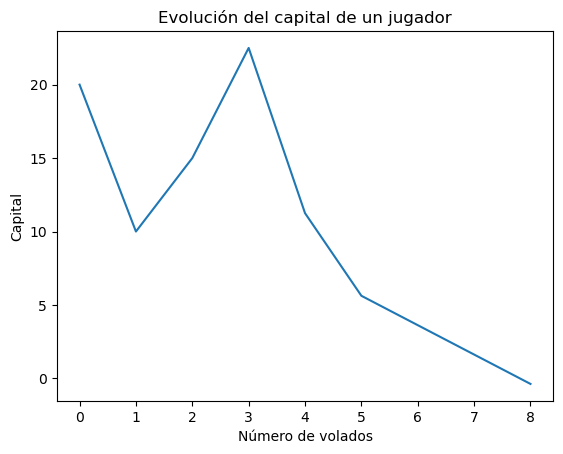

In [188]:
plt.plot(num_volados_arreglo, historial) 
plt.xlabel('Número de volados')
plt.ylabel('Capital')
plt.title('Evolución del capital de un jugador')
plt.show()

In [195]:
# Función para realizar la simulación Montecarlo con 10,000 jugadores
def juego_todos(num_jugadores=10000):
    num_volados_total = [] #aquí lista y no arreglo pq no necesito hacer operaciones dentro de la función. Sólo agregar valores a la lista. 
    for i in range(num_jugadores): #va del 0 al 9999, en total son 10,000 iteraciones 
        num_volados, _ = juego() #- sigifica que el segundo resultado no interesa 
        num_volados_total.append(num_volados)
    
    return num_volados_total   
    

volados_tot_de_todos = juego_todos() #es una lista 
promedio_quiebra = np.mean(volados_tot_de_todos) #las funciones de numpy pueden trabajar tmbn con listas de python
print("El promedio de número de volados de 10,000 jugadores para quedar en quiebra es de: " + str(promedio_quiebra))

El promedio de número de volados de 10,000 jugadores para quedar en quiebra es de: 26.399


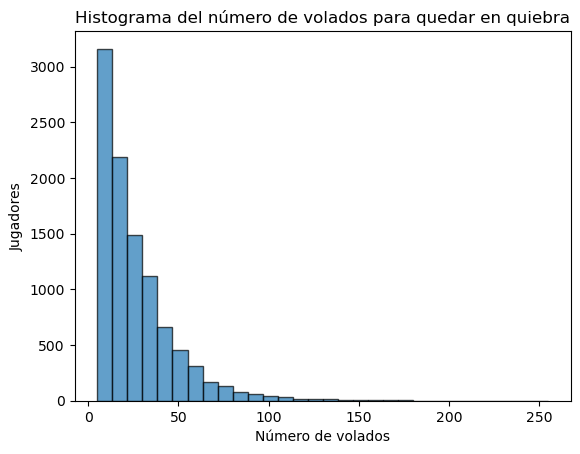

In [201]:
# Histograma 
plt.hist(volados_tot_de_todos, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Número de volados')
plt.ylabel('Jugadores')
plt.title('Histograma del número de volados para quedar en quiebra')
plt.show()